## Chapter 2

The goal of this chapter is to answer the following questions:
- What are some useful text corpora and lexical resources, and how can we access them with Python?
- Which Python costructs are most helpful for this work?
- How do we avoid repeating ourselves when writing Python code?


### Gutenberg Corpus

NLTK includes a small selection of text from the Proyecy Gutemberg electronic text archive, wich contains some 25,000 free electronic books. e begin getting the Python interpreter to load the NLTK package, then ask to see **nltk corpus.gutemberg.fileids()**, the file identifiers in this corpus:

In [4]:
import nltk
nltk.corpus.gutenberg.fileids()


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Let´s pick out the first of these texts -*Emma* by Jane Austen- and give it a short name, **emma**, then find out how many words it contains:

In [5]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
len(emma)

192427

In [6]:
emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))

In [8]:
emma.concordance("surprize")

Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

When we defined emma, we invoked the words() function of the gutenberg object in
NLTK’s corpus package. But since it is cumbersome to type such long names all the
time, Python provides another version of the import statement, as follows:

In [10]:
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [11]:
emma = gutenberg.words('austen-emma.txt')

Let's write ashort program to display other information about each text, by looping over all the values of **fileid** corresponding to the **gutenberg** file identifiers listed earlier and the computing statics for each text. For a compact output display, we will make sure that the numbers are all integers, using **int()**

In [13]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set([w.lower() for w in gutenberg.words(fileid)]))
    print (int(num_chars/num_words), int(num_words/num_sents), int(num_words/num_vocab), 
    fileid)

4 24 26 austen-emma.txt
4 26 16 austen-persuasion.txt
4 28 22 austen-sense.txt
4 33 79 bible-kjv.txt
4 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 17 12 burgess-busterbrown.txt
4 20 12 carroll-alice.txt
4 20 11 chesterton-ball.txt
4 22 11 chesterton-brown.txt
4 18 10 chesterton-thursday.txt
4 20 24 edgeworth-parents.txt
4 25 15 melville-moby_dick.txt
4 52 10 milton-paradise.txt
4 11 8 shakespeare-caesar.txt
4 12 7 shakespeare-hamlet.txt
4 12 6 shakespeare-macbeth.txt
4 36 12 whitman-leaves.txt


In [15]:
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')
macbeth_sentences

[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

## Web and Chat Text

Although Project Gutenberg contains thousand of books, it represents estabilished literature. It is importan to consider less formal lenaguage as well. NLTK's small colection of web text includes content from a Firefox discussion forum, conversations overheard in New York, the movie script of *Pirates of the Carribean*, personal advertisements, and wine reviews:

In [16]:
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], "...")

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


In [17]:
from nltk.corpus import nps_chat
chatroom = nps_chat.posts("10-19-20s_706posts.xml")
chatroom[123]

['i',
 'do',
 "n't",
 'want',
 'hot',
 'pics',
 'of',
 'a',
 'female',
 ',',
 'I',
 'can',
 'look',
 'in',
 'a',
 'mirror',
 '.']

We can access the corpus as a list of words or a list of sentences (where each sentence
is itself just a list of words). We can optionally specify particular categories or files to
read:

In [18]:
from nltk.corpus import brown
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [20]:
brown.words(categories='news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [21]:
brown.words(fileids=['cg22'])

['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]

In [22]:
brown.sents(categories=['news', 'editorial', 'reviews'])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

The Brown Corpus is a convenient resource for studying systematic differences between
genres, a kind of linguistic inquiry known as stylistics. Let’s compare genres in their
usage of modal verbs. The first step is to produce the counts for a particular genre.
Remember to import nltk before doing the following

In [24]:
from nltk.corpus import brown

news_text = brown.words(categories="news")
fdist = nltk.FreqDist([w.lower() for w in news_text])
modals = ["can", "could", "may", "might", "must", "will"]
for m in modals:
    print (m + ":", fdist[m])


can: 94
could: 87
may: 93
might: 38
must: 53
will: 389


### Your Turn:
choose a different section of the Brown Corpus, and adapt the preceding example to count a selection of *wh* words, such as *what, when, where, who* and *why*

In [27]:
from nltk.corpus import brown

news_text = brown.words(categories="mystery")
fdist = nltk.FreqDist([w.lower() for w in news_text])
modals = ["what", "when", "where", "who", "why"]
for m in modals:
    print (m + ":", fdist[m])

what: 146
when: 154
where: 71
who: 94
why: 52


 We’ll use NLTK’s support
for conditional frequency distributions. These are presented systematically in Section 2.2, where we also unpick the following code line by line. For the moment, you
can ignore the details and just concentrate on the output

In [29]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


## Reuters Corpus

The reuters Corpus contains 10,788 news documents totaling 1.3 million words. The documents have been classified into 90 topis, and grouped into two sets, called "trainig" and "test".

In [32]:
from nltk.corpus import reuters

In [33]:
reuters.fileids()

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843',
 'test/14844',
 'test/14849',
 'test/14852',
 'test/14854',
 'test/14858',
 'test/14859',
 'test/14860',
 'test/14861',
 'test/14862',
 'test/14863',
 'test/14865',
 'test/14867',
 'test/14872',
 'test/14873',
 'test/14875',
 'test/14876',
 'test/14877',
 'test/14881',
 'test/14882',
 'test/14885',
 'test/14886',
 'test/14888',
 'test/14890',
 'test/14891',
 'test/14892',
 'test/14899',
 'test/14900',
 'test/14903',
 'test/14904',
 'test/14907',
 'test/14909',
 'test/14911',
 'test/14912',
 'test/14913',
 'test/14918',
 'test/14919',
 'test/14921',
 'test/14922',
 'test/14923',
 'test/14926',
 'test/14928',
 'test/14930',
 'test/14931',
 'test/14932',
 'test/14933',
 'test/14934',
 'test/14941',
 'test/14943',
 'test/14949',
 'test/14951',
 'test/14954',
 'test/14957',
 'test/14958',
 'test/14959',
 'test/14960',
 'test/14962',
 'test/149

In [34]:
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

For convenience, the corpus methods accept a single fileid or a list of fileids.

In [35]:
reuters.categories("training/9865")

['barley', 'corn', 'grain', 'wheat']

In [36]:
reuters.categories(['training/9865', 'training/9880'])

['barley', 'corn', 'grain', 'money-fx', 'wheat']

In [37]:
reuters.fileids('barley')

['test/15618',
 'test/15649',
 'test/15676',
 'test/15728',
 'test/15871',
 'test/15875',
 'test/15952',
 'test/17767',
 'test/17769',
 'test/18024',
 'test/18263',
 'test/18908',
 'test/19275',
 'test/19668',
 'training/10175',
 'training/1067',
 'training/11208',
 'training/11316',
 'training/11885',
 'training/12428',
 'training/13099',
 'training/13744',
 'training/13795',
 'training/13852',
 'training/13856',
 'training/1652',
 'training/1970',
 'training/2044',
 'training/2171',
 'training/2172',
 'training/2191',
 'training/2217',
 'training/2232',
 'training/3132',
 'training/3324',
 'training/395',
 'training/4280',
 'training/4296',
 'training/5',
 'training/501',
 'training/5467',
 'training/5610',
 'training/5640',
 'training/6626',
 'training/7205',
 'training/7579',
 'training/8213',
 'training/8257',
 'training/8759',
 'training/9865',
 'training/9958']

In [39]:
reuters.fileids(["barley", "corn"])

['test/14832',
 'test/14858',
 'test/15033',
 'test/15043',
 'test/15106',
 'test/15287',
 'test/15341',
 'test/15618',
 'test/15648',
 'test/15649',
 'test/15676',
 'test/15686',
 'test/15720',
 'test/15728',
 'test/15845',
 'test/15856',
 'test/15860',
 'test/15863',
 'test/15871',
 'test/15875',
 'test/15877',
 'test/15890',
 'test/15904',
 'test/15906',
 'test/15910',
 'test/15911',
 'test/15917',
 'test/15952',
 'test/15999',
 'test/16012',
 'test/16071',
 'test/16099',
 'test/16147',
 'test/16525',
 'test/16624',
 'test/16751',
 'test/16765',
 'test/17503',
 'test/17509',
 'test/17722',
 'test/17767',
 'test/17769',
 'test/18024',
 'test/18035',
 'test/18263',
 'test/18482',
 'test/18614',
 'test/18908',
 'test/18954',
 'test/18973',
 'test/19165',
 'test/19275',
 'test/19668',
 'test/19721',
 'test/19821',
 'test/20018',
 'test/20366',
 'test/20637',
 'test/20645',
 'test/20649',
 'test/20723',
 'test/20763',
 'test/21091',
 'test/21243',
 'test/21493',
 'training/10120',
 'trai

Similarly, we can specify the words or sentences we want in terms of files or categories.
The first handful of words in each of these texts are the titles, which by convention are
stored as uppercase.

In [40]:
reuters.words("training/9864")[:14]

['U',
 '.',
 'S',
 'TREASURY',
 "'",
 'S',
 'MULFORD',
 'REAFFIRMS',
 'G',
 '-',
 '6',
 'AGREEMENT',
 'Treasury',
 'Assistant']

In [41]:
reuters.words(['training/9865', 'training/9880'])

reuters.words(categories='barley')

reuters.words(categories=['barley', 'corn'])

['THAI', 'TRADE', 'DEFICIT', 'WIDENS', 'IN', 'FIRST', ...]

## Inaugural Address Corpus


In [42]:
from nltk.corpus import inaugural

In [43]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [44]:
[fileid[:4] for fileid in inaugural.fileids()]

['1789',
 '1793',
 '1797',
 '1801',
 '1805',
 '1809',
 '1813',
 '1817',
 '1821',
 '1825',
 '1829',
 '1833',
 '1837',
 '1841',
 '1845',
 '1849',
 '1853',
 '1857',
 '1861',
 '1865',
 '1869',
 '1873',
 '1877',
 '1881',
 '1885',
 '1889',
 '1893',
 '1897',
 '1901',
 '1905',
 '1909',
 '1913',
 '1917',
 '1921',
 '1925',
 '1929',
 '1933',
 '1937',
 '1941',
 '1945',
 '1949',
 '1953',
 '1957',
 '1961',
 '1965',
 '1969',
 '1973',
 '1977',
 '1981',
 '1985',
 '1989',
 '1993',
 '1997',
 '2001',
 '2005',
 '2009',
 '2013',
 '2017',
 '2021']

In [1]:
cfd = nltk.ConditionalFreqDist(
    (target, file[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target)) 
cfd.plot()

NameError: name 'nltk' is not defined

## Corpora in Other Languages

NLTK comes with corpora for many languages, thouth in some cases you will need to lear how to manipulate character encodings in python before using these corpora.

In [4]:
nltk.corpus.cess_esp.words()


['El', 'grupo', 'estatal', 'Electricité_de_France', ...]

In [5]:
nltk.corpus.floresta.words()

['Um', 'revivalismo', 'refrescante', 'O', '7_e_Meio', ...]

In [7]:
nltk.corpus.indian.words('hindi.pos')

['पूर्ण', 'प्रतिबंध', 'हटाओ', ':', 'इराक', 'संयुक्त', ...]

In [8]:
nltk.corpus.udhr.fileids()

['Abkhaz-Cyrillic+Abkh',
 'Abkhaz-UTF8',
 'Achehnese-Latin1',
 'Achuar-Shiwiar-Latin1',
 'Adja-UTF8',
 'Afaan_Oromo_Oromiffa-Latin1',
 'Afrikaans-Latin1',
 'Aguaruna-Latin1',
 'Akuapem_Twi-UTF8',
 'Albanian_Shqip-Latin1',
 'Amahuaca',
 'Amahuaca-Latin1',
 'Amarakaeri-Latin1',
 'Amuesha-Yanesha-UTF8',
 'Arabela-Latin1',
 'Arabic_Alarabia-Arabic',
 'Asante-UTF8',
 'Ashaninca-Latin1',
 'Asheninca-Latin1',
 'Asturian_Bable-Latin1',
 'Aymara-Latin1',
 'Balinese-Latin1',
 'Bambara-UTF8',
 'Baoule-UTF8',
 'Basque_Euskara-Latin1',
 'Batonu_Bariba-UTF8',
 'Belorus_Belaruski-Cyrillic',
 'Belorus_Belaruski-UTF8',
 'Bemba-Latin1',
 'Bengali-UTF8',
 'Beti-UTF8',
 'Bichelamar-Latin1',
 'Bikol_Bicolano-Latin1',
 'Bora-Latin1',
 'Bosnian_Bosanski-Cyrillic',
 'Bosnian_Bosanski-Latin2',
 'Bosnian_Bosanski-UTF8',
 'Breton-Latin1',
 'Bugisnese-Latin1',
 'Bulgarian_Balgarski-Cyrillic',
 'Bulgarian_Balgarski-UTF8',
 'Cakchiquel-Latin1',
 'Campa_Pajonalino-Latin1',
 'Candoshi-Shapra-Latin1',
 'Caquinte-Latin

In [9]:
nltk.corpus.udhr.words("Javanese-Latin1")[11:]

['Saben', 'umat', 'manungsa', 'lair', 'kanthi', 'hak', ...]

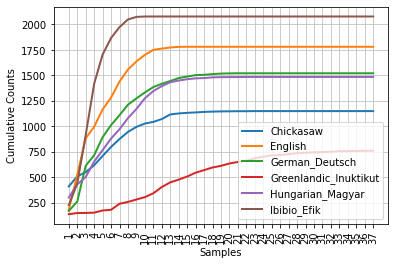

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [10]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch',
    'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))
cfd.plot(cumulative=True)

## We illustrate the difference between some of the corpus access methods here:


In [11]:
raw = gutenberg.raw("burgess-busterbrown.txt")
raw[1:20]
words = gutenberg.words("burgess-busterbrown.txt")
words[1:20]
sents = gutenberg.sents("burgess-busterbrown.txt")
sents[1:20]

NameError: name 'gutenberg' is not defined

# 2.2 Conditional Frequency Distribution

### Conditions and Events

In [12]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories = genre)
)

genre_word = [(genre, word)
    for genre in ['news', 'romance']
    for word in brown.words(categories=genre)]
len(genre_word)

NameError: name 'nltk' is not defined

In [14]:
genre_word[:4]
genre_word[-4:]

[('romance', 'afraid'),
 ('romance', 'not'),
 ('romance', "''"),
 ('romance', '.')]

In [16]:
cfd = nltk.ConditionalFreqDist(genre_word)
cfd
cfd.conditions()

['news', 'romance']

## Plotting and Tabulating Distributions


In [5]:
from nltk.corpus import inaugural

In [6]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target))

NameError: name 'nltk' is not defined

In [9]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch',
'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))

NameError: name 'nltk' is not defined

In [8]:
cfd.tabulate(conditions=["English", "German_Deutsch"], samples=range(10), cumulative=True)

NameError: name 'cfd' is not defined

## Generating Random text with Bigrams

We can use a conditionla frequency distribution to create a table of bigrams. The bigrams() function takes a list of words and builds a list of consecutive word pairs:

In [13]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven',
'and', 'the', 'earth', '.']
print(nltk.bigrams(sent))

NameError: name 'nltk' is not defined